<a href="https://colab.research.google.com/github/youngmook/cheminfo-python/blob/main/2022_kses_fall2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_context("talk")

# 1. Data

## 1.1. Data 불러오기

In [ ]:
url = "https://raw.githubusercontent.com/jehyunlee/jehyunlee.github.io/master/about/src/2022_kses/complete_dataset.csv"

df = pd.read_csv(url)
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


## 1.2. Data type check & selection

In [ ]:
# type check
df.dtypes

date                object
demand             float64
RRP                float64
demand_pos_RRP     float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
frac_at_neg_RRP    float64
min_temperature    float64
max_temperature    float64
solar_exposure     float64
rainfall           float64
school_day          object
holiday             object
dtype: object

In [ ]:
# feature selection
df_kses = df[["date", "demand", "school_day", "holiday"]]

# type conversion
df_kses["date"] = pd.to_datetime(df_kses["date"])

# set index
df_kses = df_kses.set_index("date")
df_kses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,demand,school_day,holiday
date,,,
2015-01-01,99635.030,N,Y
2015-01-02,129606.010,N,N
2015-01-03,142300.540,N,N
2015-01-04,104330.715,N,N
2015-01-05,118132.200,N,N
...,...,...,...
2020-10-02,99585.835,N,N
2020-10-03,92277.025,N,N
2020-10-04,94081.565,N,N


## 1.3. train, valid, test split

In [ ]:
years = df_kses.index.year

df_Train = df_kses.loc[years <= 2019]
df_test = df_kses.loc[years == 2020]

df_train = df_kses.loc[years <= 2018]
df_valid = df_kses.loc[years == 2019]

df_train

,demand,school_day,holiday
date,,,
2015-01-01,99635.030,N,Y
2015-01-02,129606.010,N,N
2015-01-03,142300.540,N,N
2015-01-04,104330.715,N,N
2015-01-05,118132.200,N,N
...,...,...,...
2018-12-27,129749.140,N,N
2018-12-28,133831.375,N,N
2018-12-29,108290.110,N,N


In [ ]:
df_test

,demand,school_day,holiday
date,,,
2020-01-01,89077.855,N,Y
2020-01-02,102988.185,N,N
2020-01-03,118922.215,N,N
2020-01-04,102245.610,N,N
2020-01-05,95671.200,N,N
...,...,...,...
2020-10-02,99585.835,N,N
2020-10-03,92277.025,N,N
2020-10-04,94081.565,N,N


# 2. Time Series data analysis

## 2.1. Visualization

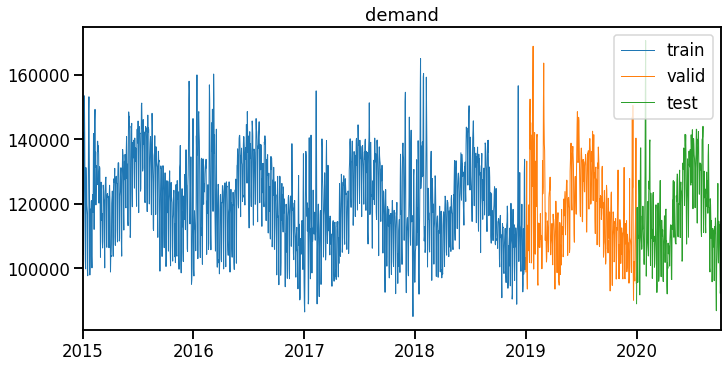

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand"], lw=1, label="train")
ax.plot(df_valid.index, df_valid["demand"], lw=1, label="valid")
ax.plot(df_test.index, df_test["demand"], lw=1, label="test")
ax.set_xlim(datetime.datetime(2015,1,1), datetime.datetime(2020,10,6))
ax.set_title("demand")
ax.legend()

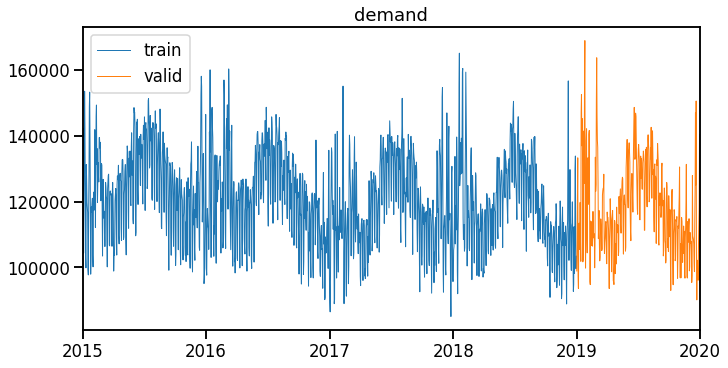

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand"], lw=1, label="train")
ax.plot(df_valid.index, df_valid["demand"], lw=1, label="valid")
#ax.plot(df_test.index, df_test["demand"], lw=1, label="test")
ax.set_xlim(datetime.datetime(2015,1,1), datetime.datetime(2020,1,1))
ax.set_title("demand")
ax.legend()

(16436.0, 18541.0)

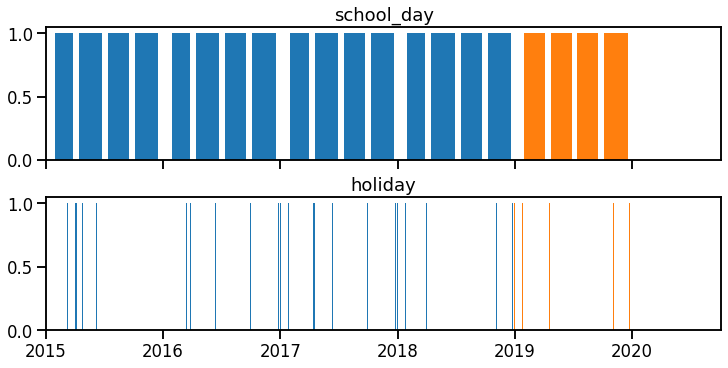

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 5), constrained_layout=True, sharex=True)

for df in [df_train, df_valid]:
    for ax, feature in zip(axs, ["school_day", "holiday"]):
        ax.bar(df.index, df[feature].map({"N":0, "Y":1}), width=1)
        ax.set_title(feature)

axs[0].set_xlim(datetime.datetime(2015,1,1), datetime.datetime(2020,10,6))

(17167.0, 17532.0)

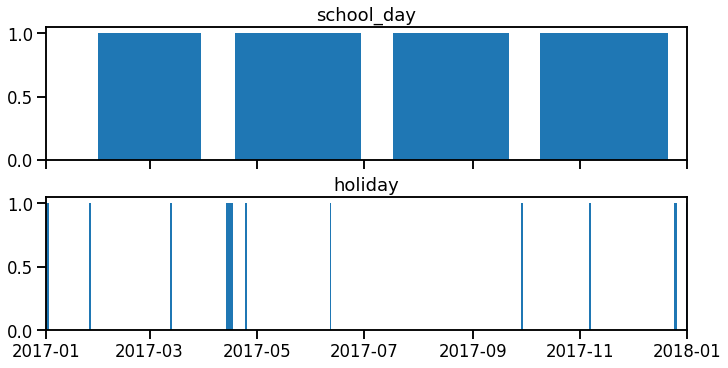

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 5), constrained_layout=True, sharex=True)

for df in [df_train, df_valid]:
    for ax, feature in zip(axs, ["school_day", "holiday"]):
        ax.bar(df.index, df[feature].map({"N":0, "Y":1}), width=1)
        ax.set_title(feature)

axs[0].set_xlim(datetime.datetime(2017,1,1), datetime.datetime(2018,1,1))

## 2.2. Noise reduction : Resampling

In [ ]:
# set index for resampling
df_train_w = df_train.resample("W").mean()
df_train_w

,demand
date,
2015-01-04,118968.073750
2015-01-11,124149.390000
2015-01-18,115676.021429
2015-01-25,128593.018571
2015-02-01,111894.315000
...,...
2018-12-09,121301.250000
2018-12-16,111661.818571
2018-12-23,106831.047857


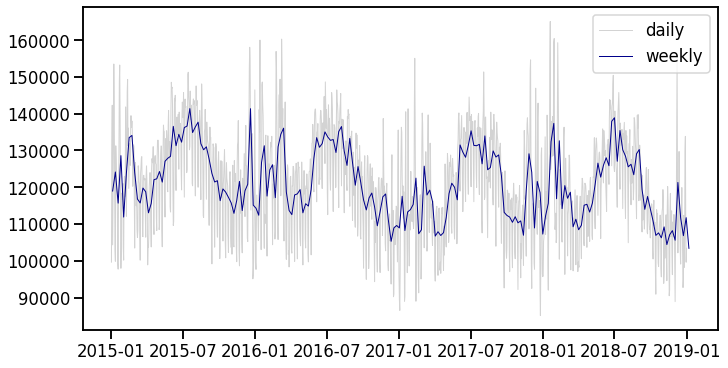

In [ ]:
# daily vs weekly
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand"], lw=1, c="lightgray", label="daily")
ax.plot(df_train_w.index, df_train_w["demand"], lw=1, c="darkblue", label="weekly")
ax.legend()

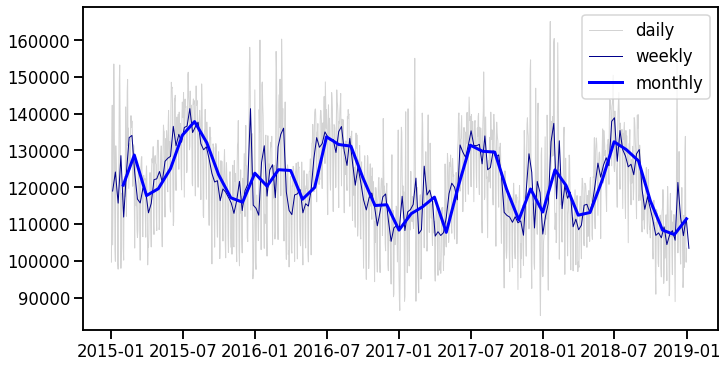

In [ ]:
# daily vs weekly vs monthly

df_train_m = df_train.resample("M").mean()

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand"], lw=1, c="lightgray", label="daily")
ax.plot(df_train_w.index, df_train_w["demand"], lw=1, c="darkblue", label="weekly")
ax.plot(df_train_m.index, df_train_m["demand"], lw=3, c="b", label="monthly")
ax.legend(loc="upper right")

## 2.3. Trend Searching

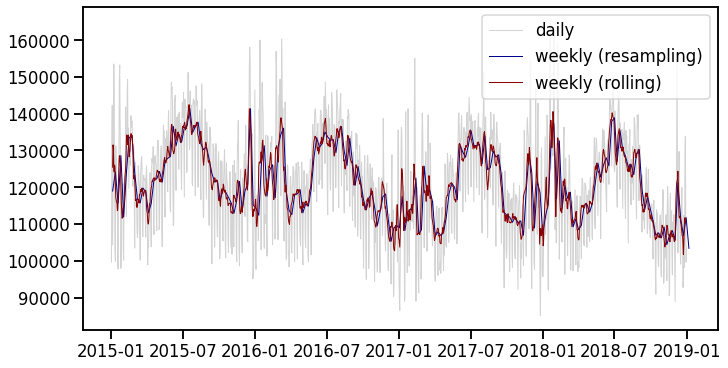

In [ ]:
# daily vs weekly, resampling vs rolling
df_train_7d = df_train.rolling(window=7, center=True).mean()

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand"], lw=1, c="lightgray", label="daily")
ax.plot(df_train_w.index, df_train_w["demand"], lw=1, c="darkblue", label="weekly (resampling)")
ax.plot(df_train_7d.index, df_train_7d["demand"], lw=1, c="darkred", label="weekly (rolling)")
ax.legend(loc="upper right")

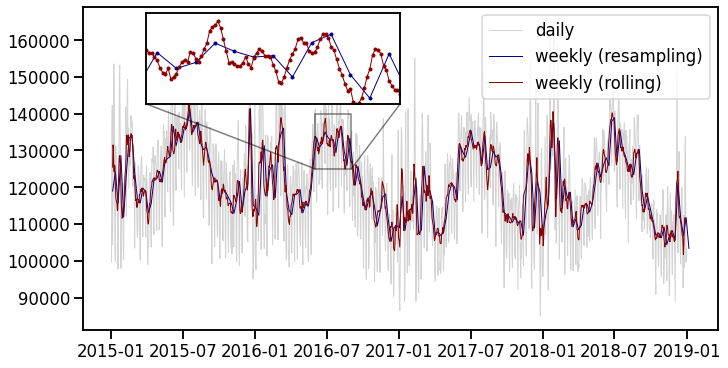

In [ ]:
ax_in = ax.inset_axes([0.1, 0.7, 0.4, 0.28])
ax_in.plot(df_train_w.index, df_train_w["demand"], "o-", lw=1, c="darkblue", ms=3)
ax_in.plot(df_train_7d.index, df_train_7d["demand"], "o-", lw=1, c="darkred", ms=3)
ax_in.set(xlim=(datetime.datetime(2016, 6, 1), datetime.datetime(2016, 9, 1)),
          ylim=(125000, 140000),
          xticks=[], yticks=[], xticklabels=[], yticklabels=[])
ax.indicate_inset_zoom(ax_in, edgecolor="k")

display(fig)

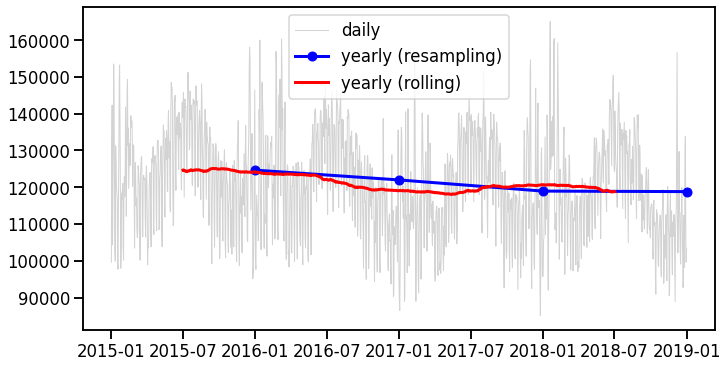

In [ ]:
# yearly, resampling vs rolling

df_train_y = df_train.resample("Y").mean()
df_train_365d = df_train.rolling(window=365, center=True).mean()

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand"], lw=1, c="lightgray", label="daily")
ax.plot(df_train_y.index, df_train_y["demand"], "o-", lw=3, c="blue", label="yearly (resampling)")
ax.plot(df_train_365d.index, df_train_365d["demand"], lw=3, c="red", label="yearly (rolling)")
ax.legend()

## 2.4. "stationary"

In [ ]:
df_train["demand_diff"] = df_train["demand"].diff()
df_train[["demand", "demand_diff"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,demand,demand_diff
date,,
2015-01-01,99635.030,NaN
2015-01-02,129606.010,29970.980
2015-01-03,142300.540,12694.530
2015-01-04,104330.715,-37969.825
2015-01-05,118132.200,13801.485
...,...,...
2018-12-27,129749.140,29731.945
2018-12-28,133831.375,4082.235
2018-12-29,108290.110,-25541.265


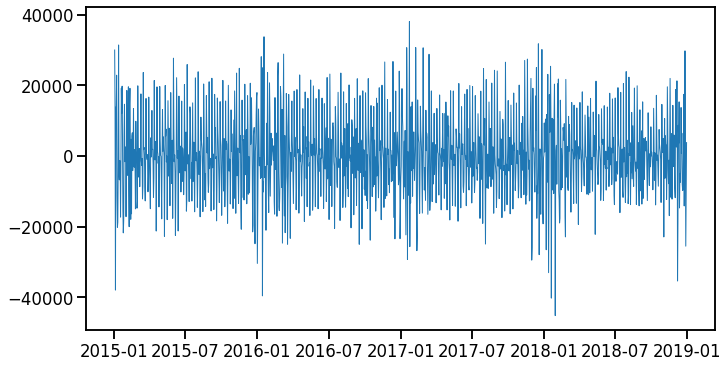

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand_diff"], lw=1)

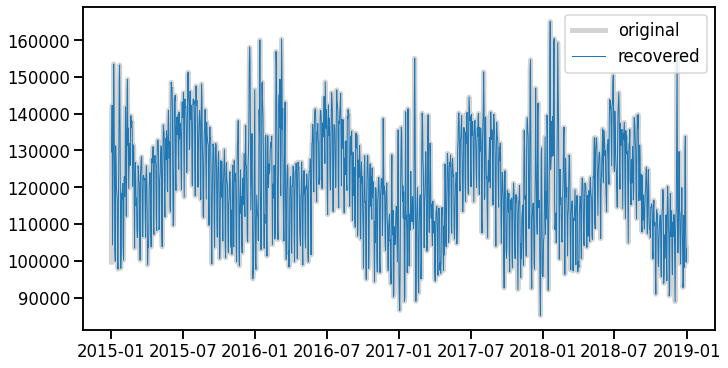

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(df_train.index, df_train["demand"], lw=5, c="lightgray", label="original")
ax.plot(df_train.index, df_train["demand_diff"].cumsum() + df_train["demand"].iloc[0], 
        lw=1, label="recovered")
ax.legend()

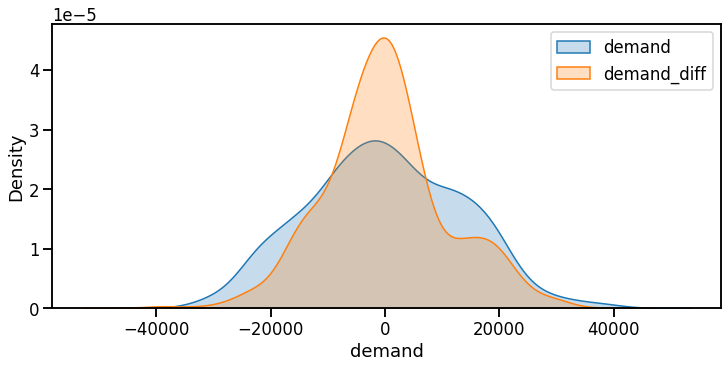

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

sns.kdeplot(df_train["demand"]-df_train["demand"].mean(), fill=True, label="demand")
sns.kdeplot(df_train["demand_diff"], fill=True, label="demand_diff")
ax.legend()

## 2.5. "seasonality"

### * Fourier Transformation

Text(0.14285714285714285, 10000000.0, '$\\d7^{-1}$')

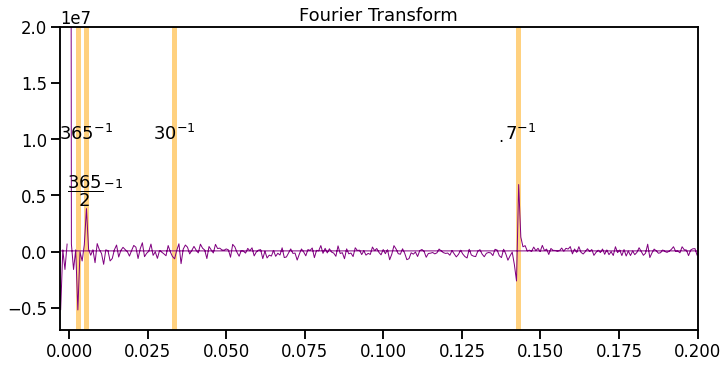

In [ ]:
sp = np.fft.fft(df_train["demand"])
freq = np.fft.fftfreq(df_train["demand"].shape[0])

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

ax.plot(freq, sp.real, lw=1, c="purple")
ax.set_xlim(-0.003, 0.2)
ax.set_ylim(-7e6, 2e7)
ax.set_title("Fourier Transform")

ax.axvline(1/365, c="orange", lw=5, alpha=0.5, zorder=0)
ax.axvline(2/365, c="orange", lw=5, alpha=0.5, zorder=0)
ax.axvline(1/30, c="orange", lw=5, alpha=0.5, zorder=0)
ax.axvline(1/7, c="orange", lw=5, alpha=0.5, zorder=0)

ax.text(2/365, 1e7, r"$365^{-1}$", ha="center", color="k", fontweight="bold")
ax.text(3/365, 5e6, r"$\dfrac{365}{2}^{-1}$", ha="center", color="k", fontweight="bold")
ax.text(1/30, 1e7, r"$30^{-1}$", ha="center", color="k", fontweight="bold")
ax.text(1/7, 1e7, r"$\d7^{-1}$", ha="center", color="k", fontweight="bold")

### * Autocorrelation

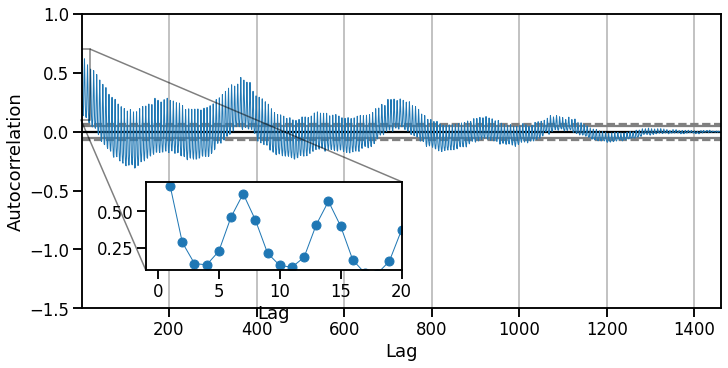

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
pd.plotting.autocorrelation_plot(df_train["demand"], lw=1)
ax.grid(axis="y")
ax.set_ylim(-1.5, 1)

ax_in = ax.inset_axes([0.1, 0.13, 0.4, 0.3])
pd.plotting.autocorrelation_plot(df_train["demand"], lw=1, marker="o", ax=ax_in)

ax_in.set(xlim=(-1, 20),
          ylim=(0.1, 0.7),
          ylabel="")
ax.indicate_inset_zoom(ax_in, edgecolor="k")
ax_in.grid(False)


## 2.6. Feature Extraction

### * 요일, 연중 날짜

In [ ]:
# 요일, 연중 날짜
for df in [df_train, df_valid, df_test, df_Train]:
    df["day"] = df.index.weekday
    df["doy"] = df.index.dayofyear
    df["delta"] = (df.index - df_kses.index[0]).days

df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,demand,school_day,holiday,demand_diff,day,doy,delta
date,,,,,,,
2015-01-01,99635.030,N,Y,NaN,3,1,0
2015-01-02,129606.010,N,N,29970.980,4,2,1
2015-01-03,142300.540,N,N,12694.530,5,3,2
2015-01-04,104330.715,N,N,-37969.825,6,4,3
2015-01-05,118132.200,N,N,13801.485,0,5,4
...,...,...,...,...,...,...,...
2018-12-27,129749.140,N,N,29731.945,3,361,1456
2018-12-28,133831.375,N,N,4082.235,4,362,1457
2018-12-29,108290.110,N,N,-25541.265,5,363,1458


In [ ]:
# day of year 순환
for df in [df_train, df_valid, df_test, df_Train]:
    df["doy_sin"] = df["doy"].apply(lambda x: np.sin(x/365 * 2*np.pi))
    df["doy_cos"] = df["doy"].apply(lambda x: np.cos(x/365 * 2*np.pi))
    df.drop("doy", axis=1, inplace=True)

df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

,demand,school_day,holiday,demand_diff,day,delta,doy_sin,doy_cos
date,,,,,,,,
2015-01-01,99635.030,N,Y,NaN,3,0,1.721336e-02,0.999852
2015-01-02,129606.010,N,N,29970.980,4,1,3.442161e-02,0.999407
2015-01-03,142300.540,N,N,12694.530,5,2,5.161967e-02,0.998667
2015-01-04,104330.715,N,N,-37969.825,6,3,6.880243e-02,0.997630
2015-01-05,118132.200,N,N,13801.485,0,4,8.596480e-02,0.996298
...,...,...,...,...,...,...,...,...
2018-12-27,129749.140,N,N,29731.945,3,1456,-6.880243e-02,0.997630
2018-12-28,133831.375,N,N,4082.235,4,1457,-5.161967e-02,0.998667
2018-12-29,108290.110,N,N,-25541.265,5,1458,-3.442161e-02,0.999407


### * -1~-6일까지 demand shift

In [ ]:
for df in [df_train, df_valid, df_test, df_Train]:
    df["demand-1"] = df["demand"].shift(1)
    df["demand-2"] = df["demand"].shift(2)
    df["demand-3"] = df["demand"].shift(3)
    df["demand-4"] = df["demand"].shift(4)
    df["demand-5"] = df["demand"].shift(5)
    df["demand-6"] = df["demand"].shift(6)
    df["demand-7"] = df["demand"].shift(7)

df_train.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,demand,school_day,holiday,demand_diff,day,delta,doy_sin,doy_cos,demand-1,demand-2,demand-3,demand-4,demand-5,demand-6,demand-7
date,,,,,,,,,,,,,,,
2015-01-01,99635.030,N,Y,NaN,3,0,0.017213,0.999852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,129606.010,N,N,29970.980,4,1,0.034422,0.999407,99635.030,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,142300.540,N,N,12694.530,5,2,0.051620,0.998667,129606.010,99635.030,NaN,NaN,NaN,NaN,NaN
2015-01-04,104330.715,N,N,-37969.825,6,3,0.068802,0.997630,142300.540,129606.010,99635.030,NaN,NaN,NaN,NaN
2015-01-05,118132.200,N,N,13801.485,0,4,0.085965,0.996298,104330.715,142300.540,129606.010,99635.030,NaN,NaN,NaN
2015-01-06,130672.485,N,N,12540.285,1,5,0.103102,0.994671,118132.200,104330.715,142300.540,129606.010,99635.030,NaN,NaN
2015-01-07,153514.820,N,N,22842.335,2,6,0.120208,0.992749,130672.485,118132.200,104330.715,142300.540,129606.010,99635.030,NaN
2015-01-08,142015.655,N,N,-11499.165,3,7,0.137279,0.990532,153514.820,130672.485,118132.200,104330.715,142300.540,129606.010,99635.03
2015-01-09,121801.155,N,N,-20214.500,4,8,0.154309,0.988023,142015.655,153514.820,130672.485,118132.200,104330.715,142300.540,129606.01


In [ ]:
# 결측치 제거

df_train = df_train.iloc[7:]
df_valid = df_valid.iloc[7:]
df_test = df_test.iloc[7:]
df_Train = df_Train.iloc[7:]

# 3. Machine Learning

## 3.3. X, y 분할

In [ ]:
X_features = ["day", "delta", "doy_sin", "doy_cos", "school_day", "holiday", "demand-1", "demand-2", "demand-3", "demand-4", "demand-5", "demand-6", "demand-7"]

X_train = df_train[X_features]
X_valid = df_valid[X_features]
X_test = df_test[X_features]
X_Train = df_Train[X_features]

y_train = df_train["demand"]
y_valid = df_valid["demand"]
y_test = df_test["demand"]
y_Train = df_Train["demand"]

## 3.4. Pipeline 구축 

In [ ]:
# pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# pipeline visualization
from sklearn import set_config
set_config(display="diagram")


In [ ]:
def get_model(method="lr", cat_cols = ["day", "school_day", "holiday"], **kwargs):
    preprocessor = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)],
                                     remainder="passthrough")
    if method == "lr":
        ml = LinearRegression(**kwargs)
    elif method == "rf":
        ml = RandomForestRegressor(**kwargs)

    model = Pipeline([("preprocessor", preprocessor), ("ml", ml)])
    
    return model

In [ ]:
# Linear Regression model 생성
model_lr = get_model()

# training
model_lr.fit(X_train, y_train)

# prediction: train vs valid
y_pred_train = model_lr.predict(X_train)
y_pred_valid = model_lr.predict(X_valid)

(16436.0, 18262.0)

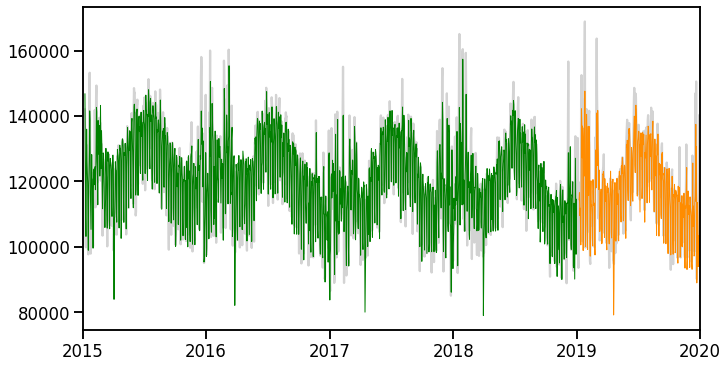

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(X_Train.index, y_Train, c="lightgray")
ax.plot(X_train.index, y_pred_train, c="g", lw=1)
ax.plot(X_valid.index, y_pred_valid, c="darkorange", lw=1)
ax.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2020,1,1))

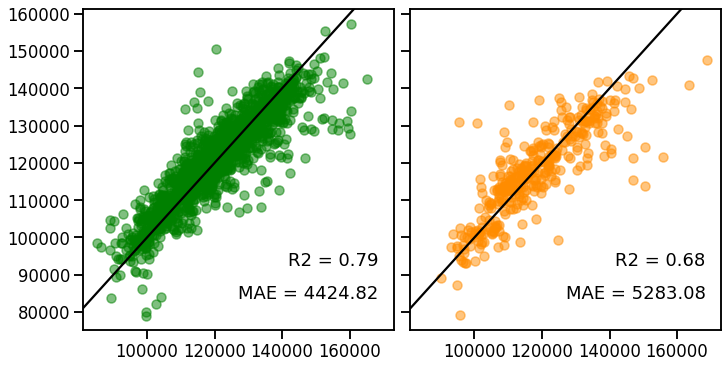

In [ ]:
def plot_parity(y_true, y_pred, c, ax):
    ax.scatter(y_true, y_pred, c=c, alpha=0.5)
    ax.axline((y_true.mean(), y_true.mean()), slope=1, c="k")
    ax.text(0.95, 0.2, f"R2 = {r2_score(y_true, y_pred):.2f}", ha="right", transform=ax.transAxes)
    ax.text(0.95, 0.1, f"MAE = {mean_absolute_error(y_true, y_pred):.2f}", ha="right", transform=ax.transAxes)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
plot_parity(y_train, y_pred_train, c="g", ax=axs[0])
plot_parity(y_valid, y_pred_valid, c="darkorange", ax=axs[1])

## 3.5. 모델 교체 : Random Forest


In [ ]:
# Random Forest model 생성
model_rf = get_model(method="rf", random_state=0)
display(model_rf)

# training
model_rf.fit(X_train, y_train)

# prediction: train vs valid
y_pred_train = model_rf.predict(X_train)
y_pred_valid = model_rf.predict(X_valid)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day', 'school_day',
                                                   'holiday'])])),
                ('ml', RandomForestRegressor(random_state=0))])

(16436.0, 18262.0)

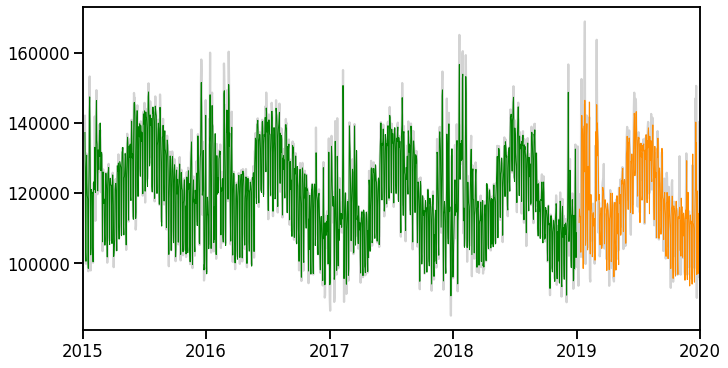

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(X_Train.index, y_Train, c="lightgray")
ax.plot(X_train.index, y_pred_train, c="g", lw=1)
ax.plot(X_valid.index, y_pred_valid, c="darkorange", lw=1)
ax.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2020,1,1))

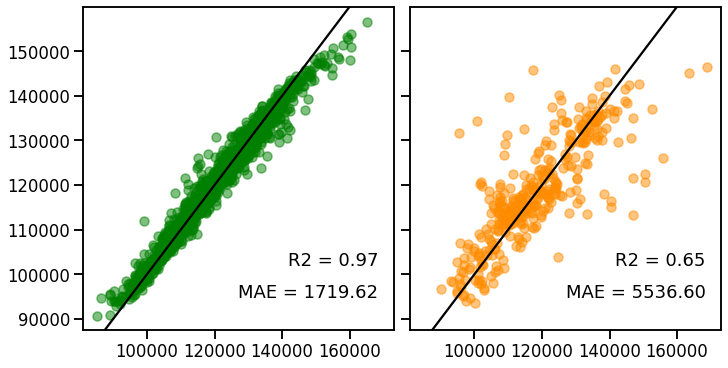

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
plot_parity(y_train, y_pred_train, c="g", ax=axs[0])
plot_parity(y_valid, y_pred_valid, c="darkorange", ax=axs[1])

## 3.6. hyperparameter tuning

### *Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# parameter grid
params = {"ml__n_estimators": [10, 50, 100, 200, 300],
          "ml__max_depth": [3, 5, 10],
          "ml__min_samples_leaf": [1, 3, 5, 7, 10],
          "ml__max_features": ["auto", "sqrt", "log2"]
          }

# GridSearchCV Pipeline 생성
model = get_model(method="rf", random_state=0)
gscv = GridSearchCV(model, param_grid=params, cv=5,
                    scoring="neg_mean_absolute_error", refit=True)

In [ ]:
# 학습시간 측정
import time

time_start = time.time()
gscv.fit(X_train, y_train)
time_end = time.time()
time_gscv = time_end-time_start
print(f"# running time: {time_gscv:.2f} sec.")

# running time: 454.49 sec.


### *Data Split for Cross Validation, for Time Series

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

cv_ts = TimeSeriesSplit(n_splits=5, gap=7, max_train_size=2000, test_size=300)

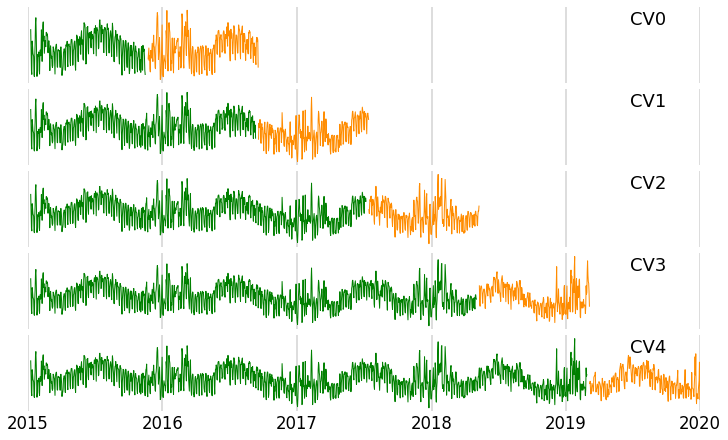

In [ ]:
all_splits = list(cv_ts.split(X_Train, y_Train))

fig, axs = plt.subplots(nrows=5, figsize=(10, 6), constrained_layout=True, sharex=True)

for i, ax in enumerate(axs):
    idx_train, idx_valid = all_splits[i]
    ax.plot(X_Train.index[idx_train], y_Train.iloc[idx_train], c="g", lw=1)
    ax.plot(X_Train.index[idx_valid], y_Train.iloc[idx_valid], c="darkorange", lw=1)
    ax.set_xlim(datetime.datetime(2015,1,1), datetime.datetime(2020,1,1))
    ax.set_yticks([])
    ax.tick_params(axis="x", length=0)
    ax.spines[:].set_visible(False)
    ax.grid(c="lightgray")
    ax.text(0.95, 0.95, f"CV{i}", transform=ax.transAxes, ha="right", va="top")

### *다시 Grid Search

In [ ]:
# GridSearchCV Pipeline 생성
model = get_model(method="rf", random_state=0)
gscv = GridSearchCV(model, param_grid=params, cv=cv_ts,
                    scoring="neg_mean_absolute_error", refit=True)

time_start = time.time()
gscv.fit(X_Train, y_Train)
time_end = time.time()
time_gscv = time_end-time_start
print(f"# running time: {time_gscv:.2f} sec.")

# running time: 392.72 sec.


In [ ]:
# best score
print(gscv.best_score_)
gscv_best = gscv.best_score_

-5470.731587660628


In [ ]:
# best hyperparameters
print(gscv.best_params_)

{'ml__max_depth': 10, 'ml__max_features': 'auto', 'ml__min_samples_leaf': 5, 'ml__n_estimators': 300}


In [ ]:
# prediction
y_pred_train = gscv.predict(X_train)
y_pred_valid = gscv.predict(X_valid)

mae_gscv = mean_absolute_error(y_valid, y_pred_valid)

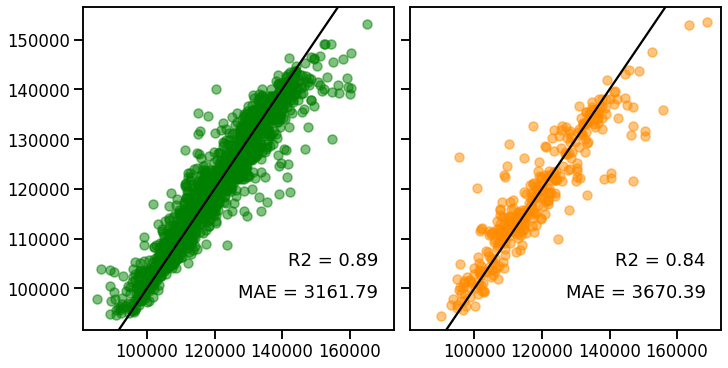

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
plot_parity(y_train, y_pred_train, c="g", ax=axs[0])
plot_parity(y_valid, y_pred_valid, c="darkorange", ax=axs[1])

### *Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# parameter distribution
params = {"ml__n_estimators": stats.randint(10, 300),   # [100, 200, 300]
          "ml__max_depth": stats.randint(3, 10),         # [3, 5, 10],
          "ml__min_samples_leaf": stats.randint(1, 10),  # [1, 3, 5, 7, 10]
          "ml__max_features": stats.uniform(0, 1),       # ["auto", "sqrt", "log2"]
          }

# RandomizedSearchCV Pipeline 생성
model = get_model(method="rf", random_state=0)
rscv = RandomizedSearchCV(model, param_distributions=params, # param_grid
                          n_iter=30,                         # number of HP sampling
                          cv=cv_ts,
                          scoring="neg_mean_absolute_error", refit=True)

# RandomizedSearchCV 학습 & 학습 시간 측정
time_start = time.time()
rscv.fit(X_Train, y_Train)
time_end = time.time()
time_rscv = time_end-time_start
print(f"# running time: {time_rscv:.2f} sec.")

# running time: 70.78 sec.


In [ ]:
# best score
print(rscv.best_score_)
rscv_best = rscv.best_score_

-5457.56934099204


In [ ]:
# best hyperparameters
print(rscv.best_params_)

{'ml__max_depth': 9, 'ml__max_features': 0.6851725577896344, 'ml__min_samples_leaf': 4, 'ml__n_estimators': 181}


In [ ]:
# prediction
y_pred_train = rscv.predict(X_train)
y_pred_valid = rscv.predict(X_valid)

mae_rscv = mean_absolute_error(y_valid, y_pred_valid)

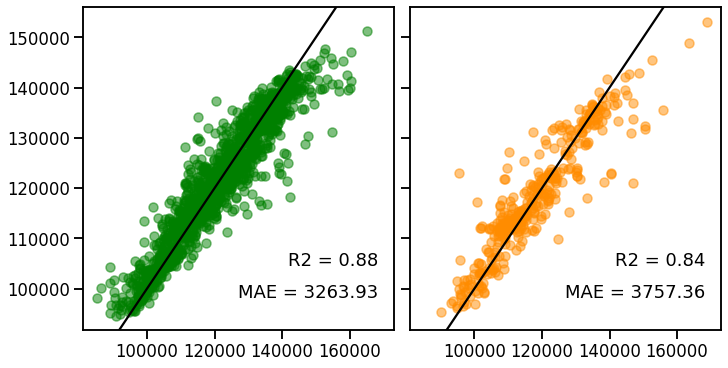

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
plot_parity(y_train, y_pred_train, c="g", ax=axs[0])
plot_parity(y_valid, y_pred_valid, c="darkorange", ax=axs[1])

### *Bayesian Search

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer

# parameter distribution
params = {"ml__n_estimators": Integer(10, 300),        # [100, 200, 300]
          "ml__max_depth": Integer(3, 10),              # [3, 5, 10],
          "ml__min_samples_leaf": Integer(1, 10),       # [1, 3, 5, 7, 10]
          "ml__max_features": Categorical(["auto", "sqrt", "log2"]) # ["auto", "sqrt", "log2"]
          }

# BayesSearchCV Pipeline 생성
model = get_model(method="rf", random_state=0)
bscv = BayesSearchCV(model, search_spaces=params,  # param_grid
                     n_iter=30,                    # number of HP sampling
                     cv=cv_ts,                         # number of folds in CV 
                     scoring="neg_mean_absolute_error", refit=True)

# BayesSearchCV 학습 & 학습 시간 측정
time_start = time.time()
bscv.fit(X_Train, y_Train)
time_end = time.time()
time_bscv = time_end-time_start
print(f"# running time: {time_bscv:.2f} sec.")

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

# running time: 249.95 sec.


In [ ]:
# best score
print(bscv.best_score_)
bscv_best = bscv.best_score_

-5463.655223641588


In [ ]:
# best hyperparameters
print(bscv.best_params_)

OrderedDict([('ml__max_depth', 10), ('ml__max_features', 'auto'), ('ml__min_samples_leaf', 4), ('ml__n_estimators', 300)])


In [ ]:
# prediction
y_pred_train = bscv.predict(X_train)
y_pred_valid = bscv.predict(X_valid)

mae_bscv = mean_absolute_error(y_valid, y_pred_valid)

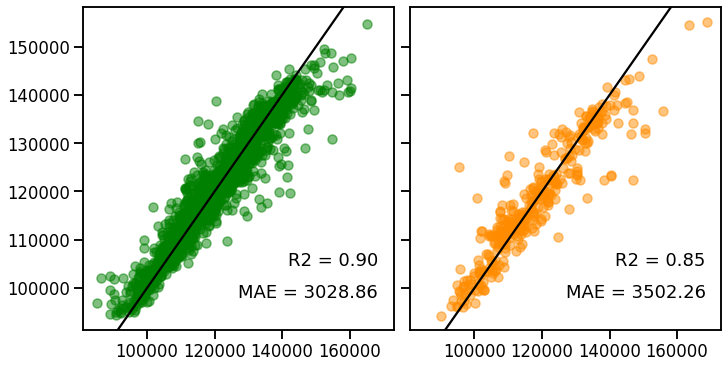

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)
plot_parity(y_train, y_pred_train, c="g", ax=axs[0])
plot_parity(y_valid, y_pred_valid, c="darkorange", ax=axs[1])

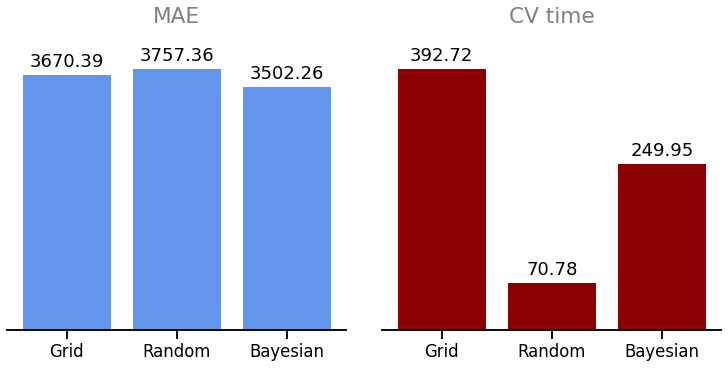

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True,
                        gridspec_kw={"wspace":0.1})

axs[0].bar([0, 1, 2], [mae_gscv, mae_rscv, mae_bscv], fc="cornflowerblue")
axs[1].bar([0, 1, 2], [time_gscv, time_rscv, time_bscv], fc="darkred")

for ax, title in zip(axs, ["MAE", "CV time"]):
    ax.set_xticks([0, 1, 2],["Grid", "Random", "Bayesian"])
    yaxis_h = ax.get_ybound()[1] - ax.get_ybound()[0]
    for p in ax.patches:
        h = p.get_height()
        w = p.get_width()
        x = p.get_x()
        
        ax.text(x+w/2, h+0.03*yaxis_h, f"{h:.2f}", ha="center")
    
    ax.set_ylim(ymax=yaxis_h*1.1)
    ax.set_title(title, color="gray", fontsize="large")
    ax.spines[["left", "top", "right"]].set_visible(False)
    ax.set_yticks([])

In [ ]:
y_pred_test_g = gscv.predict(X_test)
y_pred_test_r = rscv.predict(X_test)
y_pred_test_b = bscv.predict(X_test)

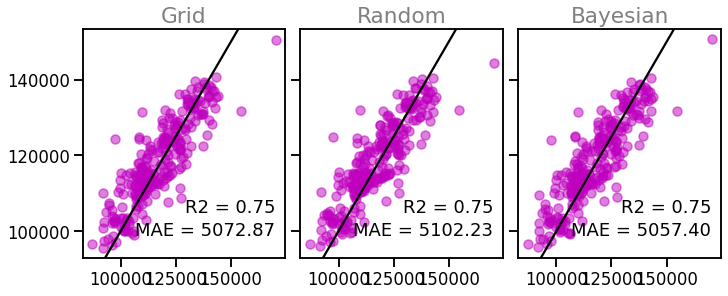

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True, sharey=True)

plot_parity(y_test, y_pred_test_g, c="m", ax=axs[0])
plot_parity(y_test, y_pred_test_r, c="m", ax=axs[1])
plot_parity(y_test, y_pred_test_b, c="m", ax=axs[2])

for ax, title in zip(axs, ["Grid", "Random", "Bayesian"]):
    ax.set_title(title, fontsize="large", color="gray")